参照: 
https://www.stat.go.jp/teacher/comp-learn-04.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
# sns.set(style="whitegrid", font=["Meiryo", "Yu Gothic", "Hiragino Maru Gothic Pro"])

# sales:売上個数
# insta_post:投稿数
# insta_good:いいね数
# flyer:チラシ配布数
# event:イベント有り1
# new_item:新作発売日1
# holiday:土日祝1

#データの読み込み
df = pd.read_csv("./data/senkei.csv", index_col=0)
df.head()

,sales,insta_post,insta_good,flyer,event,new_item,holiday
ID,,,,,,,
1,62,0,20,0,0,0,0
2,60,0,24,0,0,0,0
3,104,0,26,0,0,0,0
4,102,0,22,0,0,0,0
5,178,0,39,0,0,0,1


In [2]:
#salesの平均値/中央値/分散/標準偏差を表示
print(df["sales"].mean())
print(df["sales"].median())
print(df["sales"].var())
print(df["sales"].std())

202.66037735849056
181.0
9900.997822931786
99.50375783321847


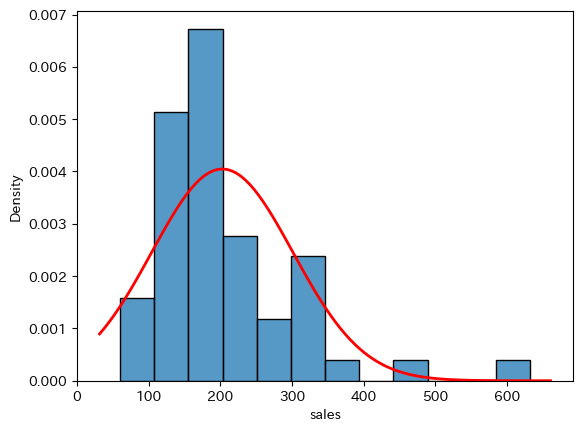

In [4]:
#salesの分布をヒストグラム(+正規分布)で表示
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# データフレーム df の "sales" 列に対するヒストグラムを描画
sns.histplot(df["sales"], kde=False, stat="density")

# 正規分布のフィット線を計算して描画
mu, std = norm.fit(df["sales"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

plt.show()


In [5]:
#各数値の相関係数を総当たりで調べる
df.corr()

,sales,insta_post,insta_good,flyer,event,new_item,holiday
sales,1.000000,0.470693,0.722425,0.704626,0.604082,0.292019,0.152803
insta_post,0.470693,1.000000,0.499784,0.312325,0.429669,0.613572,-0.212238
insta_good,0.722425,0.499784,1.000000,0.682727,0.404778,0.580890,0.215539
flyer,0.704626,0.312325,0.682727,1.000000,0.270973,0.386953,0.068837
event,0.604082,0.429669,0.404778,0.270973,1.000000,-0.027462,-0.091192
new_item,0.292019,0.613572,0.580890,0.386953,-0.027462,1.000000,-0.130223
holiday,0.152803,-0.212238,0.215539,0.068837,-0.091192,-0.130223,1.000000


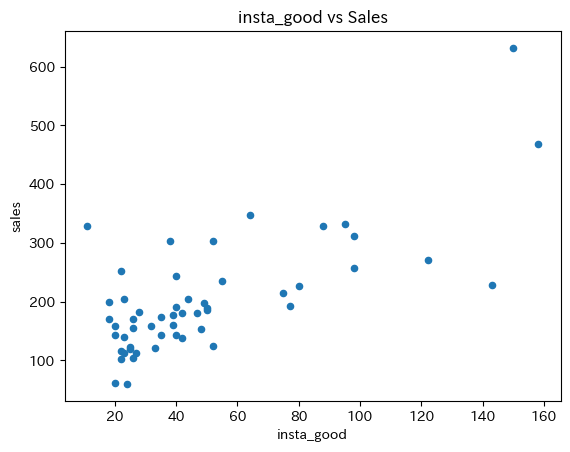

In [6]:
#insta_goodとsalesの関係を散布図で表示
df.plot.scatter(x="insta_good",y="sales")
plt.title("insta_good vs Sales")
plt.show()

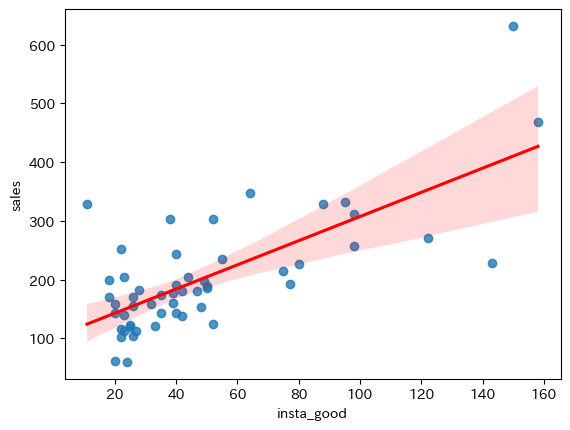

In [7]:
#insta_goodとsalesの関係を散布図で表示、回帰直線を赤線、95%信頼区間を薄赤ゾーンで表示する
sns.regplot(data=df, x="insta_good", y="sales", line_kws={"color":"red"})
plt.show()

In [8]:
#最小二乗法を用いた単回帰分析
#説明変数をinsta_good、目的変数をsales

#説明変数
x = df.iloc[:,2].values
x = x.reshape(-1,1)

#目的変数
y = df.iloc[:,0].values

#sklearnを読み込んで単回帰分析
from sklearn import linear_model
clf = linear_model.LinearRegression()

#予測モデルを作成
clf.fit(x,y)

#回帰係数(回帰式の傾き=[xとyの共分散]/[xの分散]。相関係数とは異なる。)
print(clf.coef_)

#回帰式の切片
print(clf.intercept_)

#決定係数(相関係数の2乗値)
print(clf.score(x,y))

[2.05852128]
101.71515440413765
0.5218980221448157


In [9]:
#相関係数と決定係数の違い

#相関係数 = [xとyの共分散]/([xの標準偏差]*[yの標準偏差]。-1から+1までの値をとり、2つのデータの相関性の強さを表す)
#決定係数 = 相関係数の2乗値。回帰式による収まりの良さを示す指標。

print("salesの分散 = ", df["sales"].var())
print("insta_goodの分散 = ", df["insta_good"].var())

#共分散を求めるnumpy関数。
#何も指定しないと[[xの分散, 共分散], [共分散, yの分散]]の形で出力されるため、[0][1]をつけて共分散のみ取り出す。
print("salesとinsta_goodの共分散 = ", np.cov(df["sales"],df["insta_good"])[0][1])

#数式計算で確認
print("回帰係数 = ", np.cov(df["sales"],df["insta_good"])[0][1]/df["insta_good"].var())
print("相関係数 = ", np.cov(df["sales"],df["insta_good"])[0][1]/df["sales"].std()/df["insta_good"].std())
print("決定係数 = ", (np.cov(df["sales"],df["insta_good"])[0][1]/df["sales"].std()/df["insta_good"].std())**2)

salesの分散 =  9900.997822931786
insta_goodの分散 =  1219.421625544267
salesとinsta_goodの共分散 =  2510.2053701015966
回帰係数 =  2.0585212837940374
相関係数 =  0.7224250979477497
決定係数 =  0.5218980221448157
